In [1]:
import pandas as pd
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
import torch.utils.data as data
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.ensemble import GradientBoostingRegressor
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
import keras
from keras.models import Sequential
from keras.layers import Dense
import scipy.stats as stats
from sklearn.ensemble import AdaBoostRegressor
import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_excel("original_research.xlsx")

In [3]:
df.head()

,Channel Width (m),Flow Velocity (m/s),Depth (m),Slope,Mean Diameter (mm),Total load (t/d)
0,306,1.38,5.09,0.000204,0.978193,34721.4
1,261,0.95,5.09,0.000098,0.978193,15114.2
2,258,0.82,4.89,0.000077,0.978193,7200.2
3,257,0.75,4.79,0.000066,0.978193,5243.3
4,449.2,1.43,3.54,0.000348,0.978193,125324.7


In [4]:
df.shape

(2552, 6)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2552 entries, 0 to 2551
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Channel Width (m)    2552 non-null   object
 1   Flow Velocity (m/s)  2552 non-null   object
 2   Depth (m)            2552 non-null   object
 3   Slope                2552 non-null   object
 4   Mean Diameter (mm)   2552 non-null   object
 5   Total load (t/d)     2552 non-null   object
dtypes: object(6)
memory usage: 119.8+ KB


In [6]:
df.columns

Index(['Channel Width (m)', 'Flow Velocity (m/s)', 'Depth (m)', 'Slope',
       'Mean Diameter (mm)', 'Total load (t/d)'],
      dtype='object')

In [7]:
df.isnull().sum()

,0
Channel Width (m),0
Flow Velocity (m/s),0
Depth (m),0
Slope,0
Mean Diameter (mm),0
Total load (t/d),0


In [8]:
df.duplicated().sum()

372

In [9]:
df.drop_duplicates(inplace=True)

In [10]:
df.describe()

,Channel Width (m),Flow Velocity (m/s),Depth (m),Slope,Mean Diameter (mm),Total load (t/d)
count,2180.0,2180.00,2180.00,2180.000,2180.00,2180.00
unique,2006.0,590.00,942.00,2022.000,439.00,2172.00
top,238.4,0.69,1.43,0.001,8.08,12360.41
freq,5.0,38.00,13.00,14.000,40.00,2.00


In [11]:
df.dtypes

,0
Channel Width (m),object
Flow Velocity (m/s),object
Depth (m),object
Slope,object
Mean Diameter (mm),object
Total load (t/d),object


In [12]:
# to convert the data into numeric data as it was saved as object but it is numeric
df = df.apply(pd.to_numeric, errors='coerce')

In [13]:
df.isnull().sum()

,0
Channel Width (m),1
Flow Velocity (m/s),1
Depth (m),1
Slope,1
Mean Diameter (mm),1
Total load (t/d),1


In [14]:
print(df.dtypes)

Channel Width (m)      float64
Flow Velocity (m/s)    float64
Depth (m)              float64
Slope                  float64
Mean Diameter (mm)     float64
Total load (t/d)       float64
dtype: object


In [15]:
nan_rows = df[df.isna().any(axis=1)]

print(nan_rows)


     Channel Width (m)  Flow Velocity (m/s)  Depth (m)  Slope  \
714                NaN                  NaN        NaN    NaN   

     Mean Diameter (mm)  Total load (t/d)  
714                 NaN               NaN  


In [16]:
df.dropna(inplace=True)

In [17]:
df.shape

(2179, 6)

In [18]:
df.corr()

,Channel Width (m),Flow Velocity (m/s),Depth (m),Slope,Mean Diameter (mm),Total load (t/d)
Channel Width (m),1.000000,0.238928,0.647938,-0.160873,-0.142299,0.303487
Flow Velocity (m/s),0.238928,1.000000,0.219284,0.376848,0.007859,0.487091
Depth (m),0.647938,0.219284,1.000000,-0.217712,-0.096633,0.302513
Slope,-0.160873,0.376848,-0.217712,1.000000,0.022669,0.070532
Mean Diameter (mm),-0.142299,0.007859,-0.096633,0.022669,1.000000,-0.045457
Total load (t/d),0.303487,0.487091,0.302513,0.070532,-0.045457,1.000000


<Axes: >

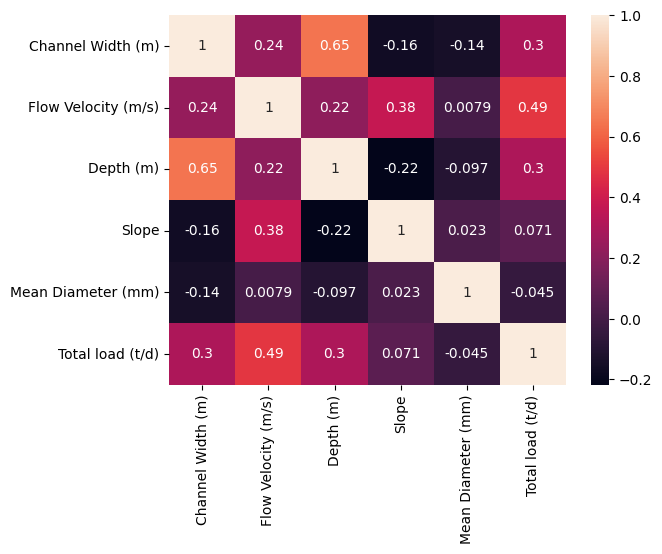

In [19]:
sns.heatmap(df.corr(),annot=True)

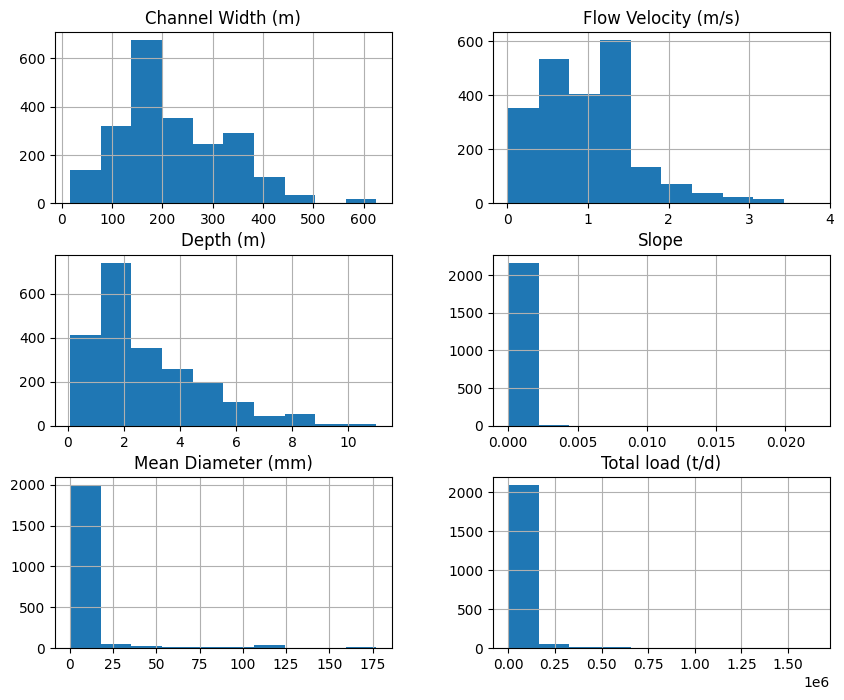

In [20]:
df.hist(figsize=(10, 8))
plt.show()

In [21]:
def remove_outliers(df, z_thresh=3):
    z_scores = np.abs((df - df.mean()) / df.std())
    return df[(z_scores < z_thresh).all(axis=1)]

data_no_outliers = remove_outliers(df)


In [22]:
data_no_outliers.head()

,Channel Width (m),Flow Velocity (m/s),Depth (m),Slope,Mean Diameter (mm),Total load (t/d)
0,306.0,1.38,5.09,0.000204,0.978193,34721.4
1,261.0,0.95,5.09,0.000098,0.978193,15114.2
2,258.0,0.82,4.89,0.000077,0.978193,7200.2
3,257.0,0.75,4.79,0.000066,0.978193,5243.3
4,449.2,1.43,3.54,0.000348,0.978193,125324.7


In [23]:
data_no_outliers.shape

(2006, 6)

In [24]:
df.head()

,Channel Width (m),Flow Velocity (m/s),Depth (m),Slope,Mean Diameter (mm),Total load (t/d)
0,306.0,1.38,5.09,0.000204,0.978193,34721.4
1,261.0,0.95,5.09,0.000098,0.978193,15114.2
2,258.0,0.82,4.89,0.000077,0.978193,7200.2
3,257.0,0.75,4.79,0.000066,0.978193,5243.3
4,449.2,1.43,3.54,0.000348,0.978193,125324.7


In [25]:
df.shape

(2179, 6)

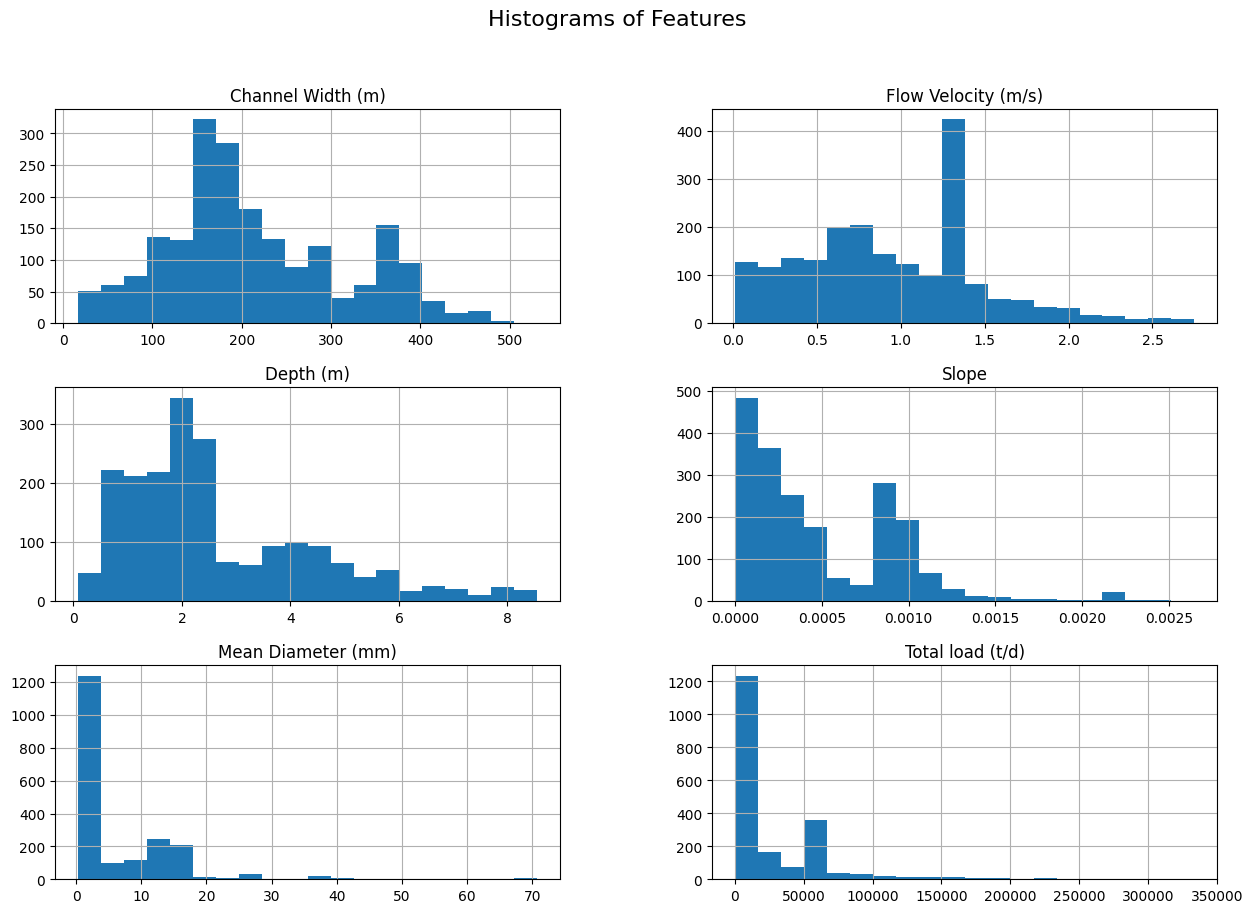

In [26]:
data_no_outliers.hist(bins=20, figsize=(15, 10))
plt.suptitle('Histograms of Features', fontsize=16)
plt.show()

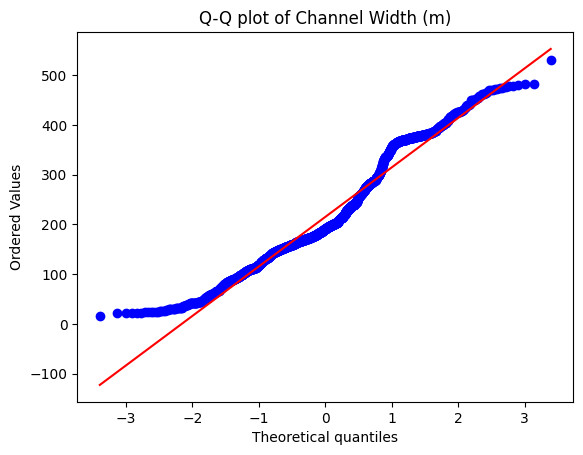

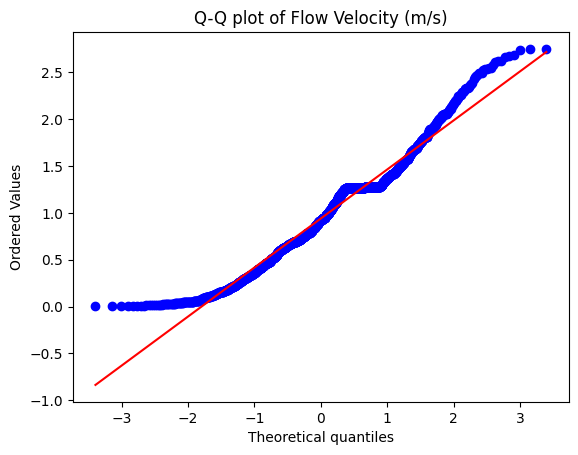

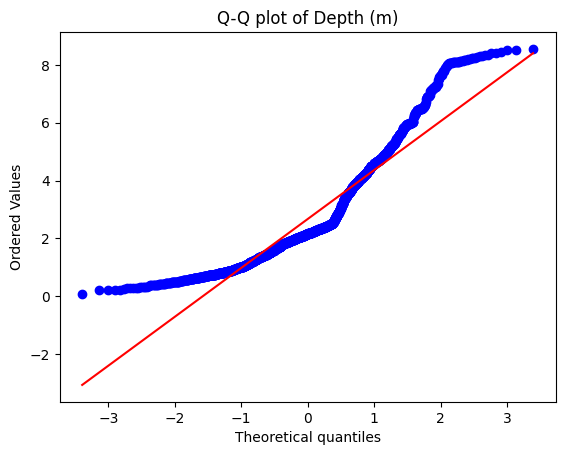

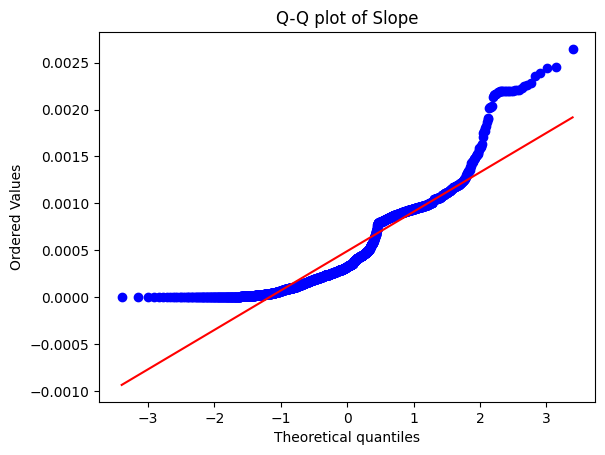

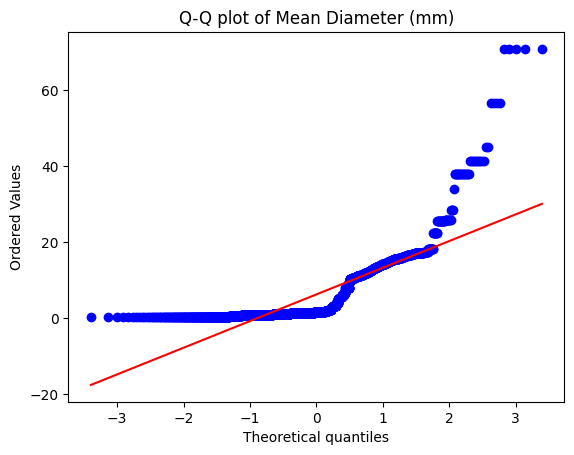

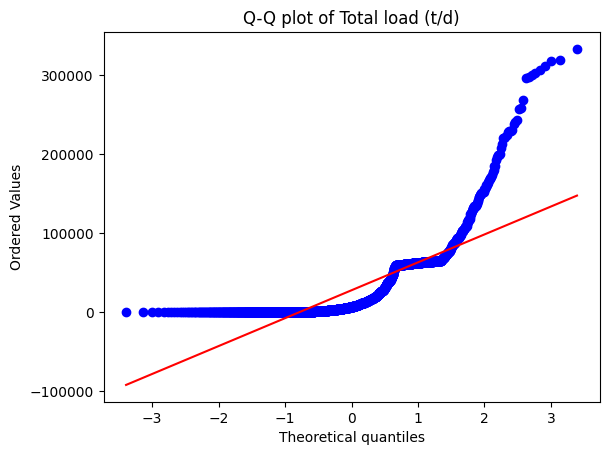

In [27]:
for col in data_no_outliers.columns:
    plt.figure()
    stats.probplot(data_no_outliers[col], dist="norm", plot=plt)
    plt.title(f'Q-Q plot of {col}')
    plt.show()

In [28]:
skewness = data_no_outliers.skew()
print(skewness)

high_skew = skewness[abs(skewness) > 0.5]
print("Highly skewed features:")
print(high_skew)


Channel Width (m)      0.501875
Flow Velocity (m/s)    0.423665
Depth (m)              1.151290
Slope                  1.273957
Mean Diameter (mm)     2.733381
Total load (t/d)       2.872936
dtype: float64
Highly skewed features:
Channel Width (m)     0.501875
Depth (m)             1.151290
Slope                 1.273957
Mean Diameter (mm)    2.733381
Total load (t/d)      2.872936
dtype: float64


In [29]:
df_log = data_no_outliers.apply(lambda x: np.log(x + 1))

In [30]:
df_sqrt = data_no_outliers.apply(lambda x: np.sqrt(x + 1))

In [31]:
from scipy.stats import boxcox

df_boxcox = pd.DataFrame()
for column in data_no_outliers.columns:
    df_boxcox[column], _ = boxcox(data_no_outliers[column] + 1)


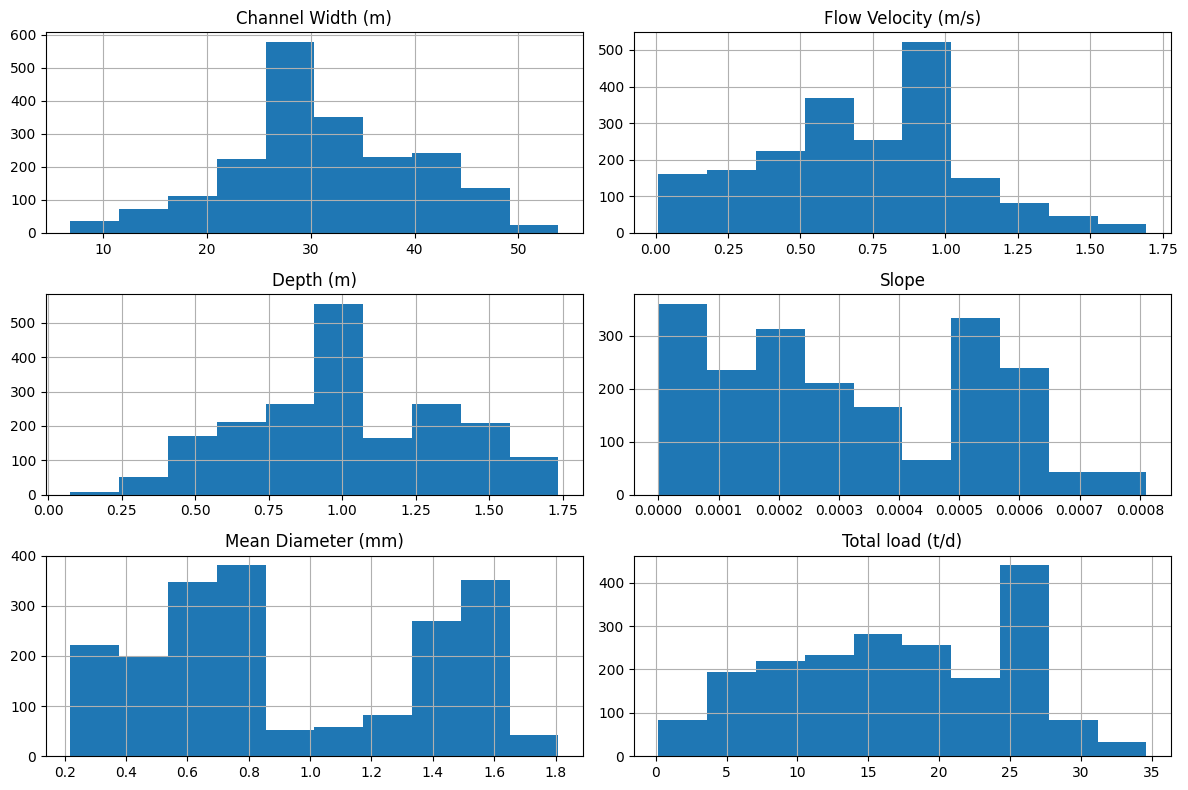

In [32]:
df_boxcox.hist(figsize=(12, 8))
plt.tight_layout()
plt.show()

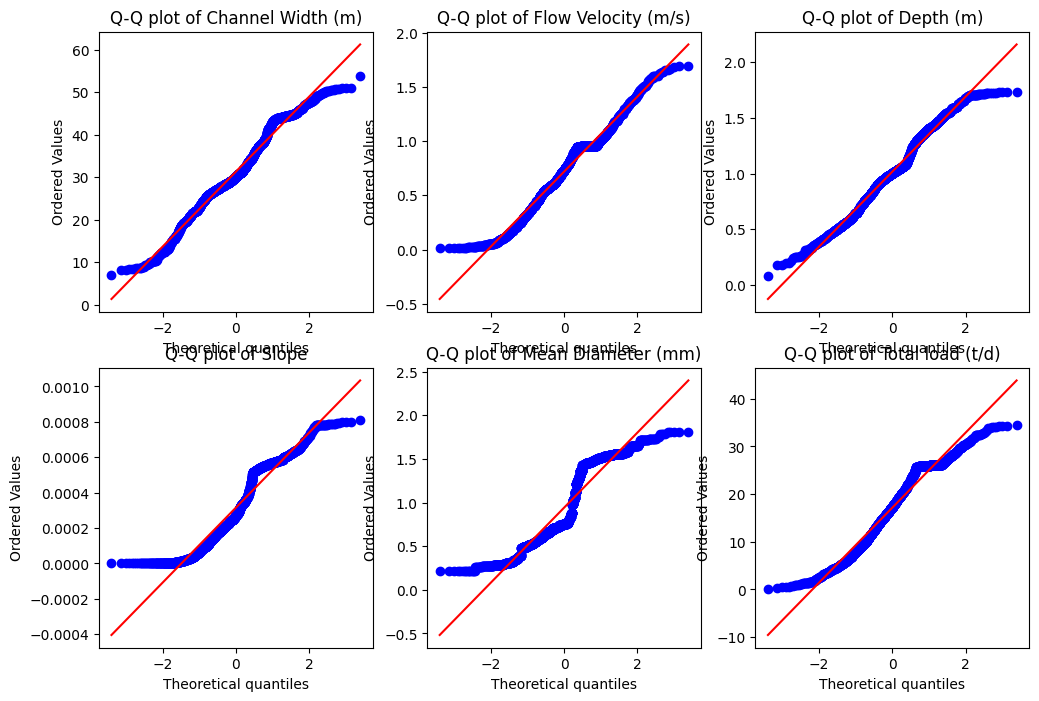

In [33]:
plt.figure(figsize=(12, 8))
for i, col in enumerate(df_boxcox.columns, 1):
    plt.subplot(2, 3, i)
    stats.probplot(df_boxcox[col], dist="norm", plot=plt)
    plt.title(f'Q-Q plot of {col}')

In [34]:
df_boxcox.isnull().sum()

,0
Channel Width (m),0
Flow Velocity (m/s),0
Depth (m),0
Slope,0
Mean Diameter (mm),0
Total load (t/d),0


In [35]:
X=df_boxcox.drop(columns=['Total load (t/d)'])
y=df_boxcox['Total load (t/d)']

In [36]:
X.shape

(2006, 5)

In [37]:
y.shape

(2006,)

In [38]:
X_train ,X_test, y_train ,y_test = train_test_split(X,y,test_size=0.2,random_state=47)

In [97]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()

In [98]:
lr.fit(X_train,y_train)

LinearRegression()

In [99]:
lr_pred=lr.predict(X_test)

In [100]:
from sklearn.metrics import r2_score , mean_squared_error
r2_eval=r2_score(y_test,lr_pred)
print("the r2 value is ",r2_eval)

the r2 value is  0.7900874726438695


In [101]:
RMSE_lr = np.sqrt(mean_squared_error(lr_pred , y_test))
print("the RMSE value is ",RMSE_lr)

the RMSE value is  3.8050966244157705


In [102]:
MSE_lr = mean_squared_error(lr_pred , y_test)
print("the MSE value is ",MSE_lr)

the MSE value is  14.47876032114029


In [103]:
pip install scikit-optimize

In [104]:
from skopt.space import Integer, Real , Categorical
from skopt import BayesSearchCV

In [105]:
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor()
model.fit(X_train, y_train)

RandomForestRegressor()

In [106]:
params = {
    'n_estimators': Integer(10, 500),
    'max_depth': Integer(1, 50),
    'min_samples_split': Integer(2, 20),
    'min_samples_leaf': Integer(1, 20)
}

In [107]:
opt = BayesSearchCV(model, params, n_iter=40, cv=5, n_jobs=-1, random_state=42)

In [108]:
opt.fit(X_train, y_train)

BayesSearchCV(cv=5, estimator=RandomForestRegressor(), n_iter=40, n_jobs=-1,
              random_state=42,
              search_spaces={'max_depth': Integer(low=1, high=50, prior='uniform', transform='normalize'),
                             'min_samples_leaf': Integer(low=1, high=20, prior='uniform', transform='normalize'),
                             'min_samples_split': Integer(low=2, high=20, prior='uniform', transform='normalize'),
                             'n_estimators': Integer(low=10, high=500, prior='uniform', transform='normalize')})

In [109]:
print("Best parameters found: ", opt.best_params_)

Best parameters found:  OrderedDict([('max_depth', 39), ('min_samples_leaf', 1), ('min_samples_split', 2), ('n_estimators', 500)])


In [110]:
y_pred = opt.predict(X_test)

In [111]:
r2 = r2_score(y_test, y_pred)
print("R² score:", r2)

R² score: 0.9121435983524147


In [112]:
MSE_rf = mean_squared_error(y_test , y_pred)
print("the MSE value is ",MSE_rf)

the MSE value is  6.059913613326676


In [113]:
RMSE_rf = np.sqrt(mean_squared_error(y_test , y_pred))
print("the RMSE value is ",RMSE_rf)

the RMSE value is  2.461689178862083


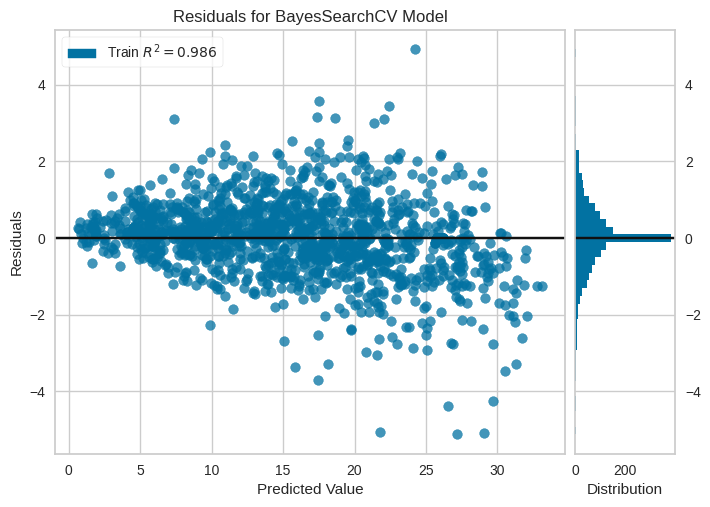

<Axes: title={'center': 'Residuals for BayesSearchCV Model'}, xlabel='Predicted Value', ylabel='Residuals'>

In [114]:
from yellowbrick.regressor import ResidualsPlot
from sklearn.linear_model import LinearRegression
from sklearn.datasets import make_regression

visualizer = ResidualsPlot(opt)
visualizer.fit(X_train, y_train)
visualizer.show()


In [115]:
from sklearn.ensemble import StackingRegressor
base_models = [
    ('BayesSearchModel', opt),
    ('gbr', GradientBoostingRegressor(n_estimators=636, min_samples_split=19, min_samples_leaf=8, learning_rate=0.01435284482838229,subsample=0.5)),
    ('abr', AdaBoostRegressor(learning_rate=0.04029470728206176 ,n_estimators=269 , loss='exponential'))
]
final_model=RandomForestRegressor(n_estimators=500,min_samples_leaf=1,max_depth=21,min_samples_split=2)

In [116]:
stacking_model = StackingRegressor(
    estimators=base_models,
    final_estimator=final_model,
)

In [117]:
stacking_model.fit(X_train, y_train)

StackingRegressor(estimators=[('BayesSearchModel',
                               BayesSearchCV(cv=5,
                                             estimator=RandomForestRegressor(),
                                             n_iter=40, n_jobs=-1,
                                             random_state=42,
                                             search_spaces={'max_depth': Integer(low=1, high=50, prior='uniform', transform='normalize'),
                                                            'min_samples_leaf': Integer(low=1, high=20, prior='uniform', transform='normalize'),
                                                            'min_samples_split': Integer(low=2, high=20, p...
                                                            'n_estimators': Integer(low=10, high=500, prior='uniform', transform='normalize')})),
                              ('gbr',
                               GradientBoostingRegressor(learning_rate=0.01435284482838229,
                                                         min_samples_leaf=8,
                                                         min_samples_split=19,
                                                         n_estimators=636,
                                                         subsample=0.5)),
                              ('abr',
                               AdaBoostRegressor(learning_rate=0.04029470728206176,
                                                 loss='exponential',
                                                 n_estimators=269))],
                  final_estimator=RandomForestRegressor(max_depth=21,
                                                        n_estimators=500))

In [118]:
final_pred=stacking_model.predict(X_test)

In [119]:
r2_stack = r2_score(y_test, final_pred)
print("R² score:", r2)

R² score: 0.9121435983524147


In [120]:
MSE_stack = mean_squared_error(y_test , final_pred)
print("the MSE value is ",MSE_stack)

the MSE value is  6.969239698761439


In [121]:
RMSE_stack = np.sqrt(mean_squared_error(y_test , final_pred))
print("the RMSE value is ",RMSE_stack)

the RMSE value is  2.6399317602471166


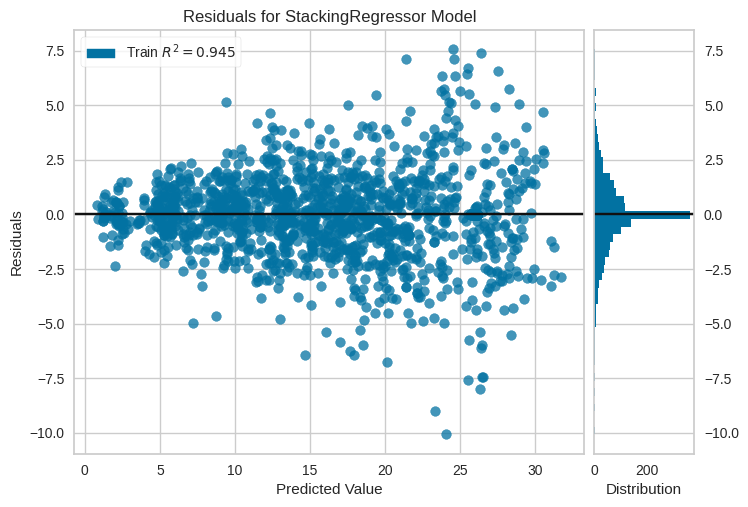

<Axes: title={'center': 'Residuals for StackingRegressor Model'}, xlabel='Predicted Value', ylabel='Residuals'>

In [122]:
from yellowbrick.regressor import ResidualsPlot
from sklearn.linear_model import LinearRegression
from sklearn.datasets import make_regression

visualizer = ResidualsPlot(stacking_model)
visualizer.fit(X_train, y_train)
visualizer.show()


In [91]:
model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(64, activation='relu'),
    Dense(1)
])




In [92]:
model.compile(optimizer='adam', loss='mean_squared_error')

In [93]:
model.fit(X_train, y_train, epochs=250, validation_split=0.2)

Epoch 1/250
41/41 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 145.4655 - val_loss: 55.5177
Epoch 2/250
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 56.1578 - val_loss: 55.7238
Epoch 3/250
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 54.3814 - val_loss: 54.3316
Epoch 4/250
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 56.0343 - val_loss: 53.2479
Epoch 5/250
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 52.8935 - val_loss: 52.0339
Epoch 6/250
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 53.1224 - val_loss: 50.3918
Epoch 7/250
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 50.9886 - val_loss: 48.5884
Epoch 8/250
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 46.4520 - val_loss: 48.3610
Epoch 9/250
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 45.6402 - val_loss: 46.8771
Epoch 10/250
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 42.3678 - val_loss: 39.8768
Epoch 11/250
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 39.4444 - val_loss: 34.6286
Epoch 12/250
41/41 ━━━━━━━━━━━━━━━━━━━━ 

In [94]:
loss = model.evaluate(X_test, y_test)
print('Test loss:', loss)

13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 8.3128 
Test loss: 9.260442733764648


In [95]:
y_pred = model.predict(X_test)

13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step


In [96]:
r2 = r2_score(y_test, y_pred)
print('R^2 score:', r2)

R^2 score: 0.8657424483055332


In [47]:
class RiverData(data.Dataset):
    def __init__(self, data):
        self.data = data

    def __len__(self):
        return len(self.data)

    def __getitem__(self, idx):
      features = torch.tensor(self.data.iloc[idx][:-1], dtype=torch.float32)
      label = torch.tensor(self.data.iloc[idx][-1], dtype=torch.float32)
      return features, label

In [48]:
train_loader = data.DataLoader(RiverData(train_data), batch_size=32, shuffle=True)
test_loader = data.DataLoader(RiverData(test_data), batch_size=32, shuffle=False)

In [49]:
class RegressionModel(nn.Module):
    def __init__(self, input_size, output_size):
        super(RegressionModel, self).__init__()
        self.fc1 = nn.Linear(input_size, 64)
        self.fc2 = nn.Linear(64, 32)
        self.fc3 = nn.Linear(32, output_size)

    def forward(self, x):

        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        x = self.fc3(x)
        return x

In [50]:
model = RegressionModel(input_size=5, output_size=1)

In [51]:
optimizer = optim.Adam(model.parameters(), lr=0.001)
criterion = nn.MSELoss()

In [52]:
df_boxcox.reset_index(drop=True, inplace=True)

In [53]:
print(f"Number of rows in df_boxcox: {len(df_boxcox)}")

Number of rows in df_boxcox: 2006


In [54]:
print(f"Number of rows in training data: {len(train_data)}")

Number of rows in training data: 1604


In [55]:
num_epochs = 500

for epoch in range(num_epochs):
    model.train()
    for inputs, labels in train_loader:
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

    print(f'Epoch {epoch+1}/{num_epochs}, Loss: {loss.item():.4f}')

Epoch 1/500, Loss: 25.4833
Epoch 2/500, Loss: 37.5401
Epoch 3/500, Loss: 67.8557
Epoch 4/500, Loss: 78.4428
Epoch 5/500, Loss: 85.9544
Epoch 6/500, Loss: 31.4115
Epoch 7/500, Loss: 25.7729
Epoch 8/500, Loss: 26.0522
Epoch 9/500, Loss: 70.3771
Epoch 10/500, Loss: 106.4349
Epoch 11/500, Loss: 51.5751
Epoch 12/500, Loss: 36.0132
Epoch 13/500, Loss: 75.5940
Epoch 14/500, Loss: 66.4848
Epoch 15/500, Loss: 85.3743
Epoch 16/500, Loss: 86.7431
Epoch 17/500, Loss: 45.2634
Epoch 18/500, Loss: 19.2142
Epoch 19/500, Loss: 31.9040
Epoch 20/500, Loss: 33.9398
Epoch 21/500, Loss: 92.0219
Epoch 22/500, Loss: 37.9200
Epoch 23/500, Loss: 72.5093
Epoch 24/500, Loss: 46.6956
Epoch 25/500, Loss: 82.7155
Epoch 26/500, Loss: 105.1594
Epoch 27/500, Loss: 121.2329
Epoch 28/500, Loss: 44.3653
Epoch 29/500, Loss: 42.6713
Epoch 30/500, Loss: 97.1700
Epoch 31/500, Loss: 17.2999
Epoch 32/500, Loss: 66.8596
Epoch 33/500, Loss: 28.3474
Epoch 34/500, Loss: 52.2454
Epoch 35/500, Loss: 32.1669
Epoch 36/500, Loss: 76.951

In [56]:
model.eval()
with torch.no_grad():
    for inputs, labels in test_loader:
        outputs = model(inputs)
        mse = criterion(outputs, labels)
        print(f'MSE: {mse.item():.4f}')

MSE: 63.9048
MSE: 57.0748
MSE: 76.0780
MSE: 57.3426
MSE: 64.6001
MSE: 67.7397
MSE: 74.0863
MSE: 51.0905
MSE: 55.0829
MSE: 71.9587
MSE: 59.6431
MSE: 59.5705
MSE: 50.5544


In [61]:
from sklearn.metrics import r2_score , mean_squared_error
model.eval()
with torch.no_grad():
    for inputs, labels in test_loader:
        outputs = model(inputs)
        mse = criterion(outputs, labels)
        r2 = r2_score(labels.cpu().numpy(), outputs.cpu().numpy())
        print(f'R-squared: {r2:.4f}')

R-squared: 0.0889
R-squared: 0.0657
R-squared: -0.1615
R-squared: 0.0835
R-squared: 0.0409
R-squared: 0.0278
R-squared: 0.0157
R-squared: 0.0594
R-squared: 0.0625
R-squared: 0.0450
R-squared: 0.0438
R-squared: 0.0931
R-squared: 0.0111


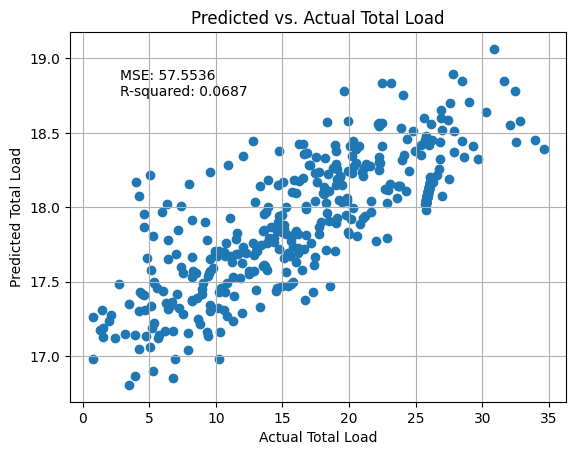

In [62]:
predicted_values = []
actual_values = []

with torch.no_grad():
    for inputs, labels in test_loader:
        outputs = model(inputs)
        predicted_values.extend(outputs.cpu().numpy().flatten())
        actual_values.extend(labels.cpu().numpy())

mse = mean_squared_error(actual_values, predicted_values)
r2 = r2_score(actual_values, predicted_values)

plt.scatter(actual_values, predicted_values)
plt.xlabel("Actual Total Load")
plt.ylabel("Predicted Total Load")
plt.title("Predicted vs. Actual Total Load")
plt.grid(True)

plt.text(0.1, 0.9, f"MSE: {mse:.4f}\nR-squared: {r2:.4f}", transform=plt.gca().transAxes, horizontalalignment='left', verticalalignment='top')

plt.show()

In [63]:
class EnhancedRegressionModel(nn.Module):
    def __init__(self, input_dim):
        super(EnhancedRegressionModel, self).__init__()
        self.layer1 = nn.Linear(input_dim, 64)
        self.layer2 = nn.Linear(64, 32)
        self.layer3 = nn.Linear(32, 16)
        self.output = nn.Linear(16, 1)
        self.relu = nn.ReLU()

    def forward(self, x):
        x = self.relu(self.layer1(x))
        x = self.relu(self.layer2(x))
        x = self.relu(self.layer3(x))
        return self.output(x)

input_dim = X_train.shape[1]
model = EnhancedRegressionModel(input_dim)


In [77]:
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.01)

X_train_array = X_train.to_numpy()
y_train_array = y_train.to_numpy()
X_test_array = X_test.to_numpy()
y_test_array = y_test.to_numpy()

X_train_tensor = torch.tensor(X_train_array, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train_array, dtype=torch.float32).view(-1, 1)
X_test_tensor = torch.tensor(X_test_array, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test_array, dtype=torch.float32).view(-1, 1)



train_losses = []
epochs = 1000
for epoch in range(epochs):
    model.train()
    optimizer.zero_grad()
    outputs = model(X_train_tensor)
    loss = criterion(outputs, y_train_tensor)
    loss.backward()
    optimizer.step()

    train_losses.append(loss.item())
    if (epoch+1) % 100 == 0:
        print(f'Epoch [{epoch+1}/{epochs}], Loss: {loss.item():.4f}')


Epoch [100/1000], Loss: 9.7888
Epoch [200/1000], Loss: 9.6484
Epoch [300/1000], Loss: 9.5782
Epoch [400/1000], Loss: 9.4938
Epoch [500/1000], Loss: 9.3924
Epoch [600/1000], Loss: 9.2897
Epoch [700/1000], Loss: 9.1867
Epoch [800/1000], Loss: 9.1108
Epoch [900/1000], Loss: 9.0519
Epoch [1000/1000], Loss: 9.1814


In [78]:
model.eval()
with torch.no_grad():
    predictions = model(X_test_tensor)
    test_loss = criterion(predictions, y_test_tensor)
    print(f'Test Loss: {test_loss.item():.4f}')


Test Loss: 9.0105


In [79]:
model.eval()
with torch.no_grad():
    predictions = model(X_test_tensor)
    test_loss = criterion(predictions, y_test_tensor)
    print(f'Test Loss: {test_loss.item():.4f}')

    predictions_np = predictions.cpu().numpy()
    y_test_np = y_test_tensor.cpu().numpy()

    r2 = r2_score(y_test_np, predictions_np)
    mse = mean_squared_error(y_test_np, predictions_np)

    print(f'R² Score: {r2:.4f}')
    print(f'Mean Squared Error: {mse:.4f}')

Test Loss: 9.0105
R² Score: 0.8694
Mean Squared Error: 9.0105


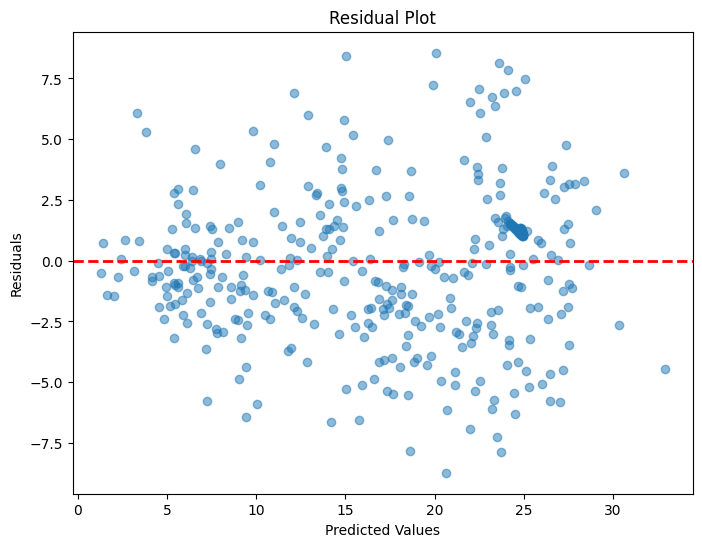

In [80]:
residuals = y_test_np - predictions_np
plt.figure(figsize=(8, 6))
plt.scatter(predictions_np, residuals, alpha=0.5)
plt.axhline(0, color='red', linestyle='--', lw=2)
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.show()

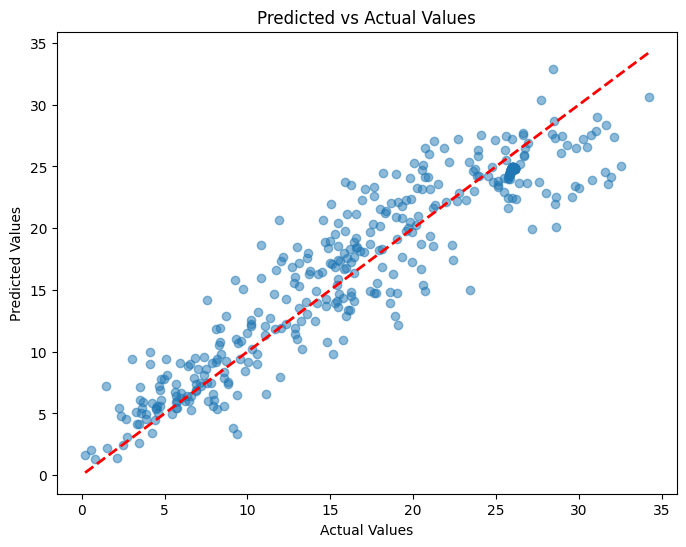

In [81]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test_np, predictions_np, alpha=0.5)
plt.plot([y_test_np.min(), y_test_np.max()], [y_test_np.min(), y_test_np.max()], 'r--', lw=2)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Predicted vs Actual Values')
plt.show()

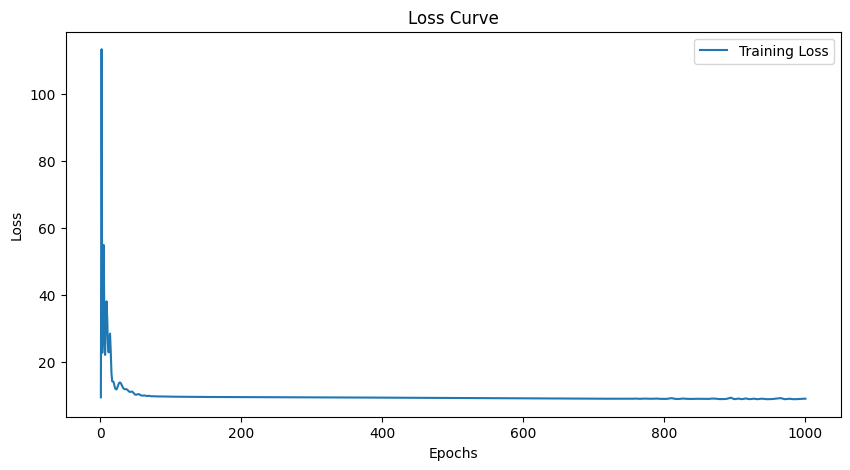

In [84]:
plt.figure(figsize=(10, 5))
plt.plot(range(1, epochs + 1), train_losses, label='Training Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Loss Curve')
plt.legend()
plt.show()

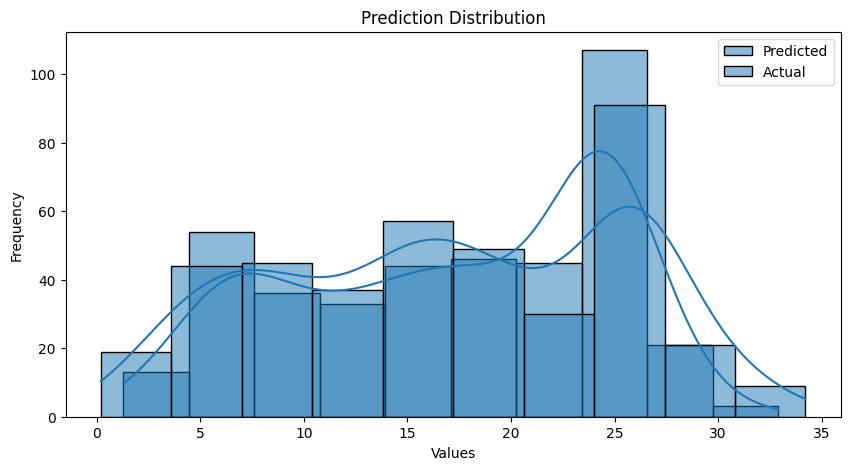

In [85]:
plt.figure(figsize=(10, 5))
sns.histplot(predictions_np, color='blue', label='Predicted', kde=True)
sns.histplot(y_test_np, color='orange', label='Actual', kde=True)
plt.xlabel('Values')
plt.ylabel('Frequency')
plt.title('Prediction Distribution')
plt.legend()
plt.show()


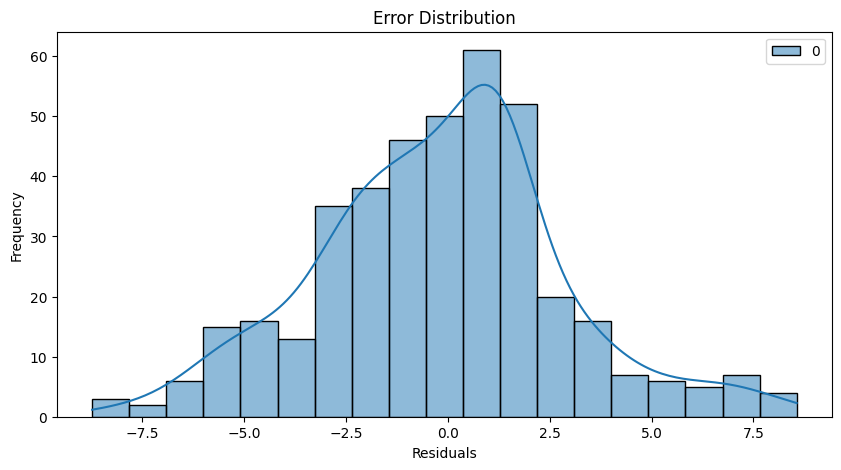

In [88]:
residuals = y_test_np - predictions_np

plt.figure(figsize=(10, 5))
sns.histplot(residuals, kde=True)
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.title('Error Distribution')
plt.show()
